# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [98]:
student_number = 400104929
full_name = 'Taraneh Khosrojerdi'
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [100]:
df = pd.read_csv('./nutrition.csv')
print(len(df))
df.head()

8618


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [102]:
df.set_index('ID', inplace=True)
df_categorical = df.iloc[:, :6]
df.drop(df.columns[:6].values, axis=1, inplace=True)
df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

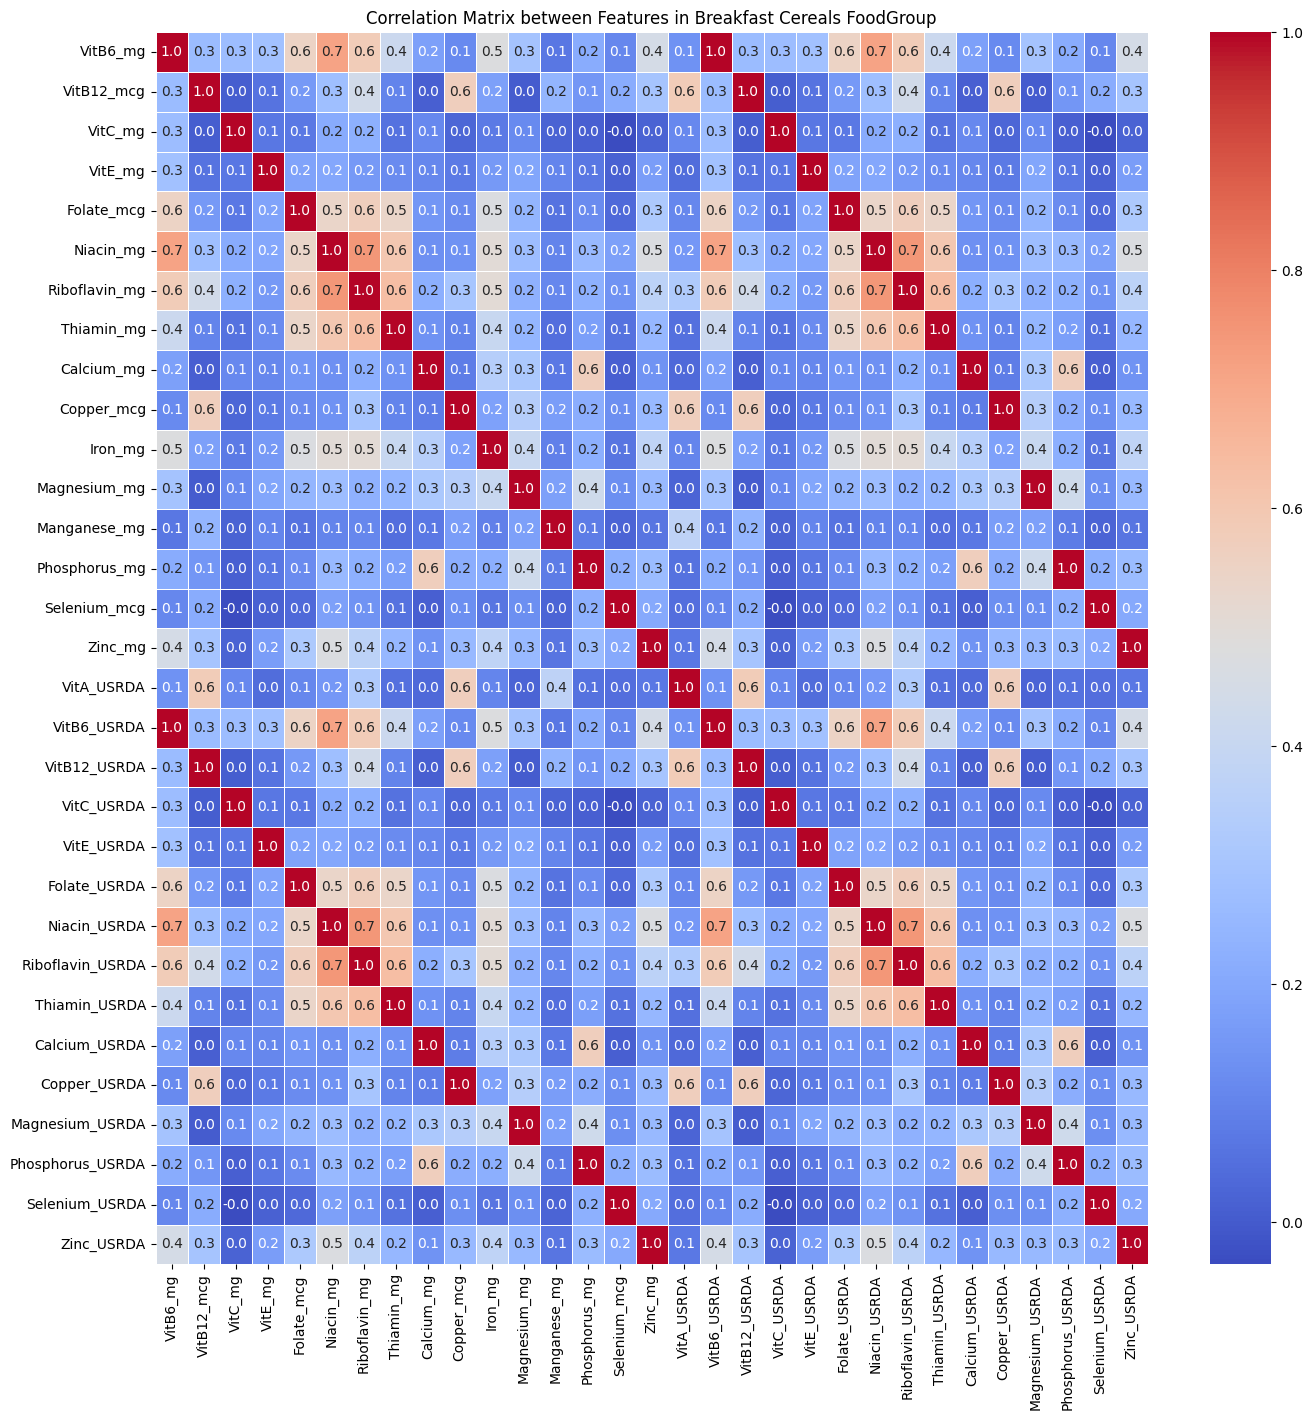

In [103]:
plt.figure(figsize=(16, 16))
correlation_matrix = df.iloc[:, 7:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Matrix between Features in Breakfast Cereals FoodGroup')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

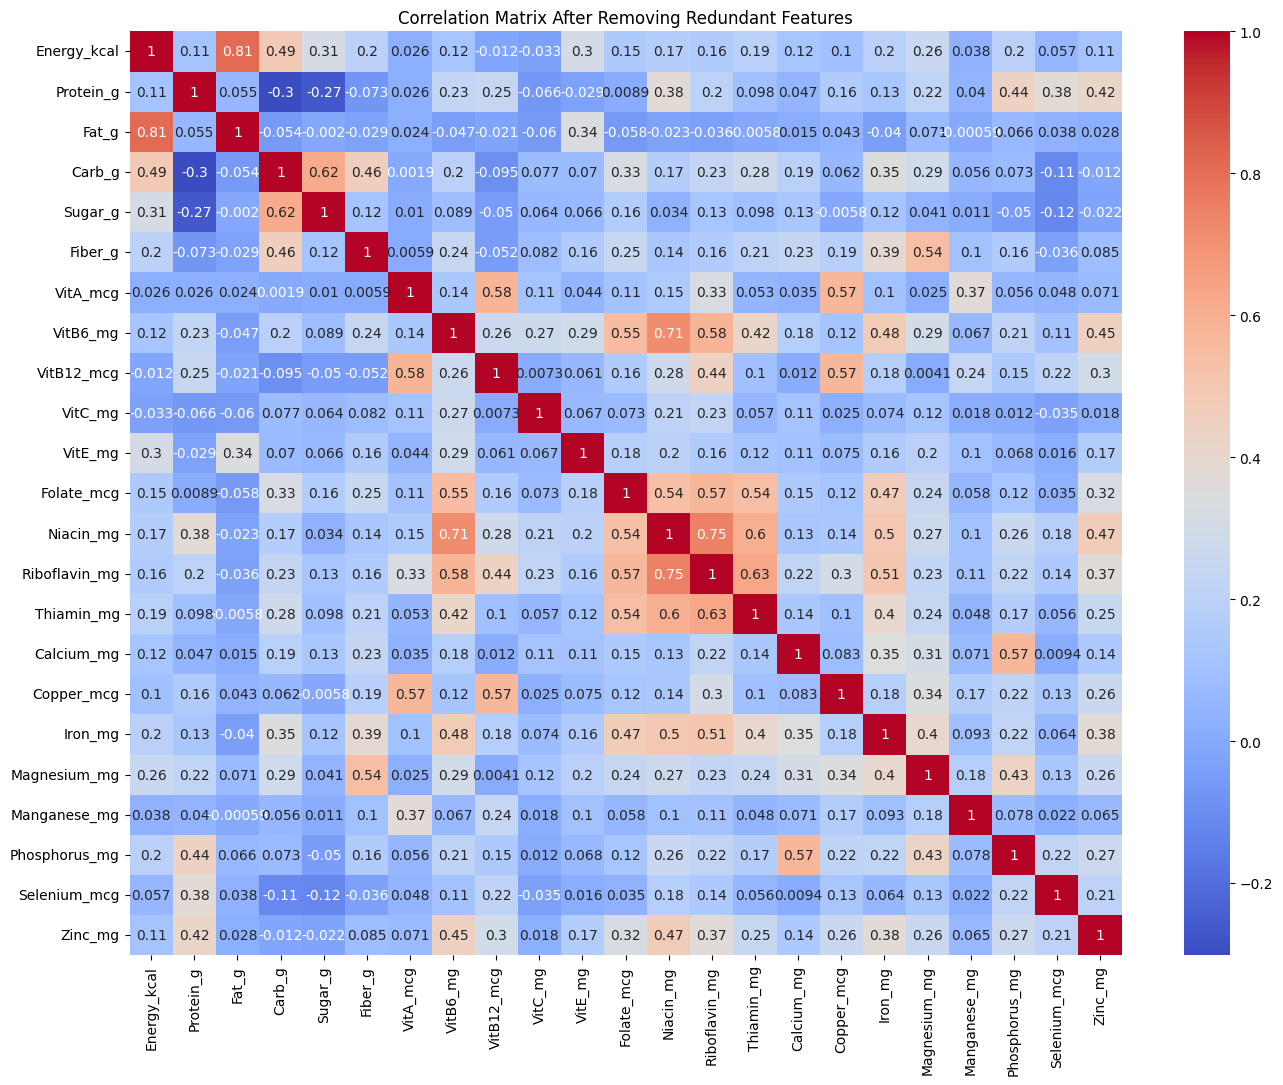

In [124]:
threshold = 0.9
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

df.drop(columns=highly_correlated_features, inplace=True)

plt.figure(figsize=(16,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Removing Redundant Features')
plt.show()


Explore the dataset by plotting the distribution of each feature separately.

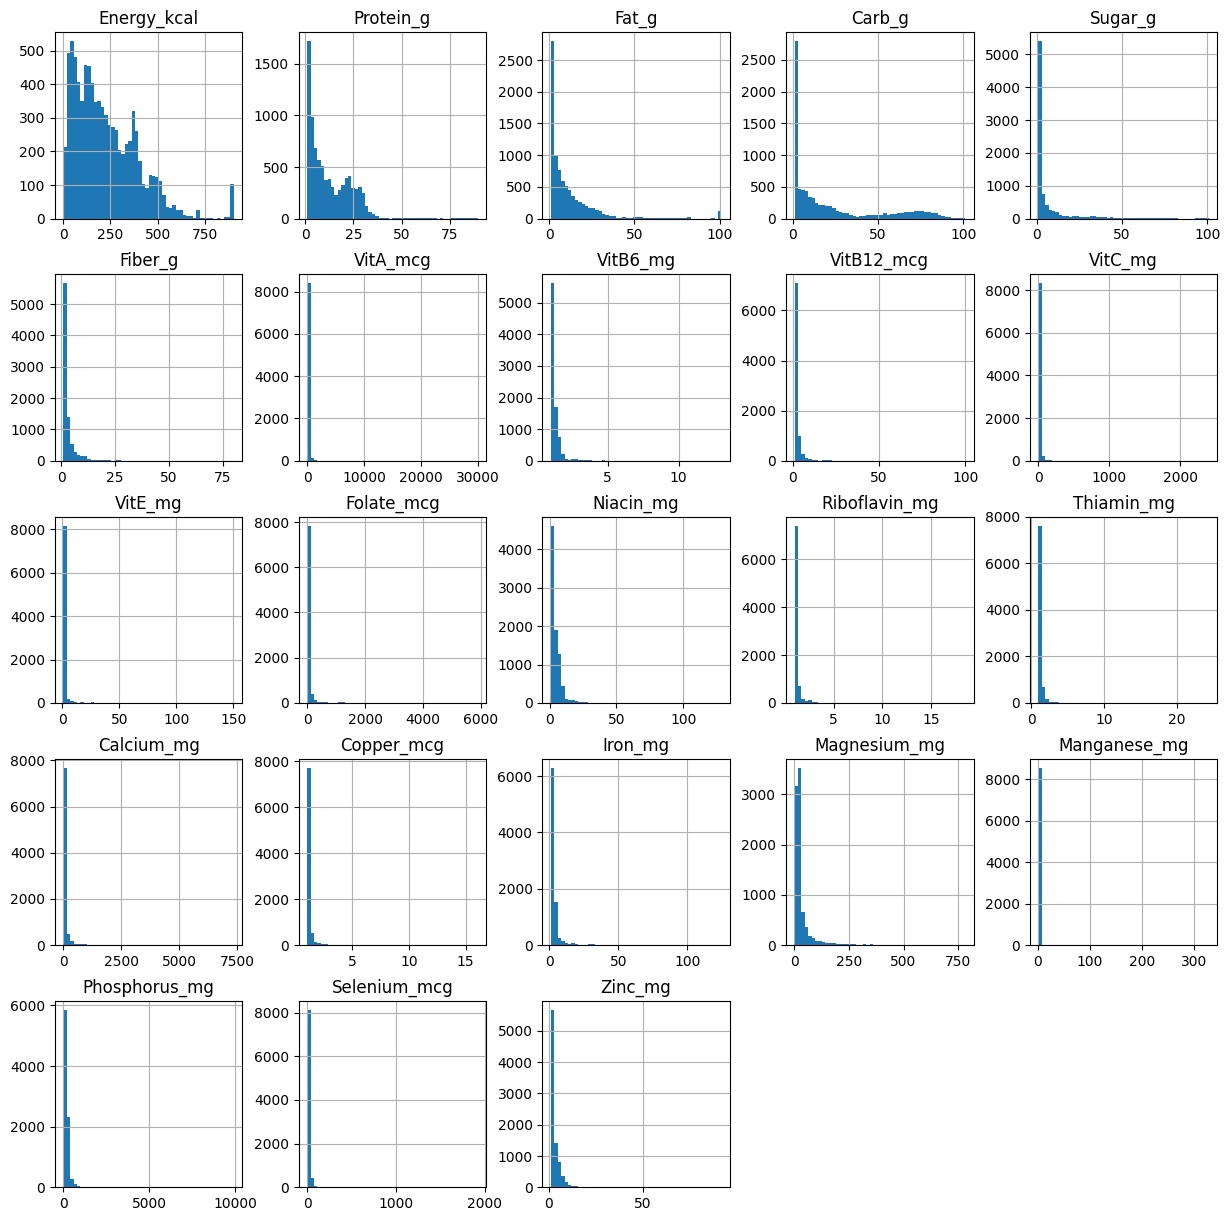

In [125]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [126]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df = df + 1
df_boxcoxed = pd.DataFrame(index=df.index)

for i in df.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

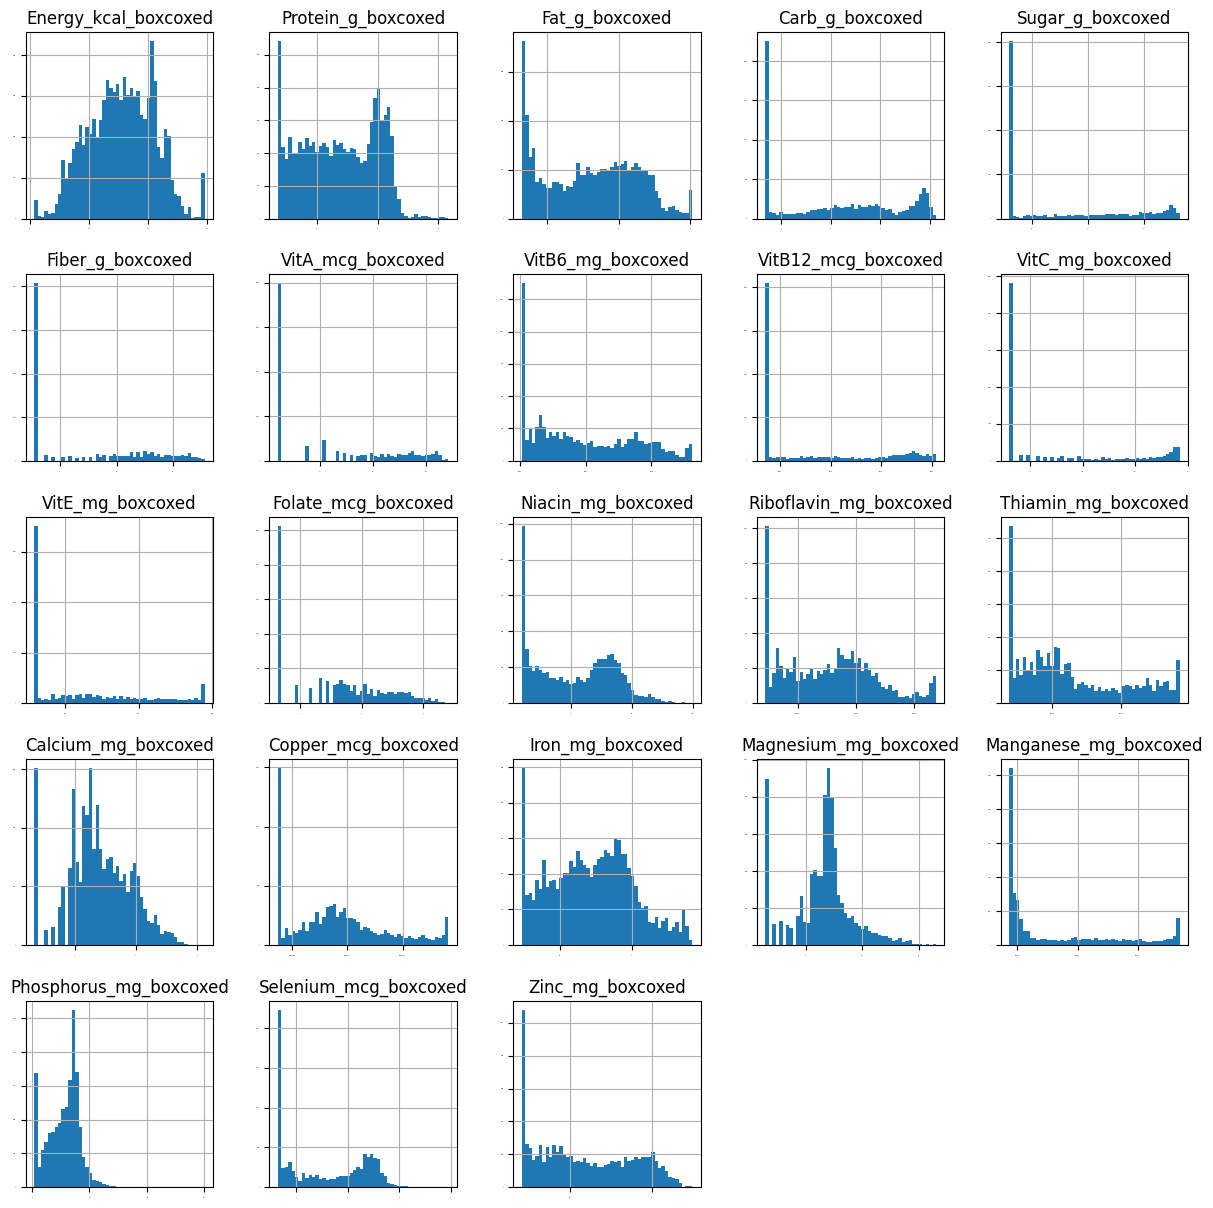

In [127]:
df_boxcoxed.hist(bins=50, figsize=(15, 15), xlabelsize=-1, ylabelsize=-1)
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [128]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_boxcoxed)

df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

print("Total mean:", np.round(np.mean(df_standardized.values), 3))
print("Total standard dev:", np.round(np.std(df_standardized.values), 3))


Total mean: -0.0
Total standard dev: 1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [129]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_index]
        sorted_eigenvectors = eigenvectors[:, sorted_index]
        self.components = sorted_eigenvectors[:, :self.n_components]
        self.explained_variance_ratio_ = sorted_eigenvalues[:self.n_components] / sorted_eigenvalues.sum()

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [130]:
custom_pca = CustomPCA(n_components = df_standardized.shape[1])
custom_pca.fit(df_standardized)
pca = custom_pca.transform(df_standardized)

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


Explained variance ratio by each principal component:
 [0.34201663 0.18090738 0.09151284 0.06219667 0.05618892 0.03766641
 0.02962186 0.02599448 0.02305219 0.019549   0.01846935 0.01736988
 0.01443521 0.01326126 0.01087405 0.00991775 0.00913376 0.00889237
 0.0075931  0.00675914 0.00604673 0.0054799  0.00306112]


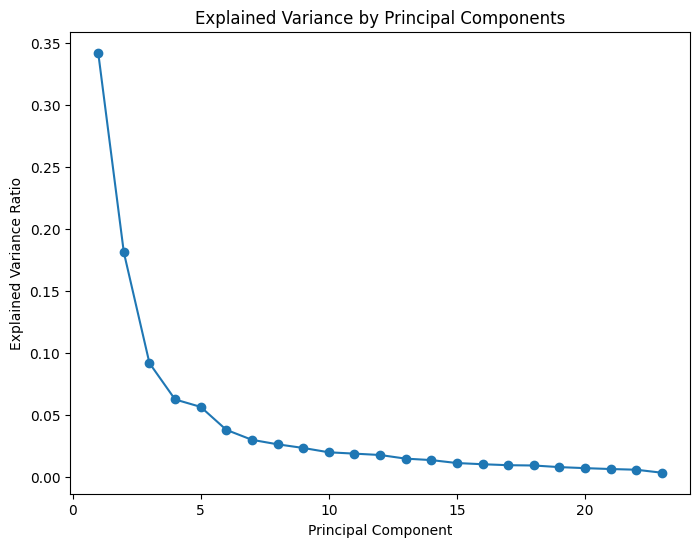

In [131]:
explained_variance_ratio = custom_pca.get_explained_variance_ratio()
print("Explained variance ratio by each principal component:\n", explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

therefore we are going to pick 5 components

In [132]:
total_explained_variance_ratio_5 = custom_pca.get_explained_variance_ratio()[:5].sum()
print(total_explained_variance_ratio_5)

0.7328224403769742


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [133]:
pca_result_5 = pca[:, :5]
df_pca_5 = pd.DataFrame(pca_result_5, index=df.index)
df_pca_5 = df_pca_5.join(df_categorical)
df_pca_5.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)
df_pca_5.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
df_pca_5.head()

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,2.664489,1.541540,-1.430919,-3.718820,2.476222,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,2.577553,1.407838,-1.420043,-3.610509,2.547996,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,3.662751,1.913525,-2.176190,-3.602617,2.485621,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,-1.960525,1.385173,0.401287,-2.410400,1.059869,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,-1.565245,1.353701,0.227594,-2.547624,1.445912,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

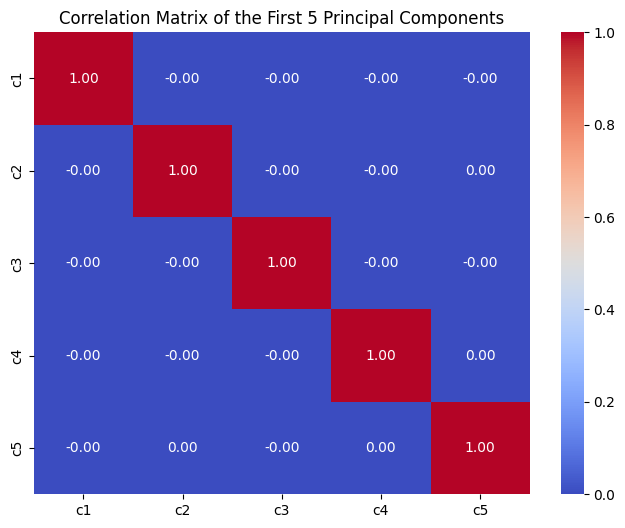

In [134]:
plt.figure(figsize=(8, 6))
correlation_matrix_5 = df_pca_5.drop(columns=['FoodGroup', 'ShortDescrip', 'Descrip']).corr()
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the First 5 Principal Components')
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [135]:
# Get eigenvectors (components)
eigenvectors = custom_pca.components[:5]


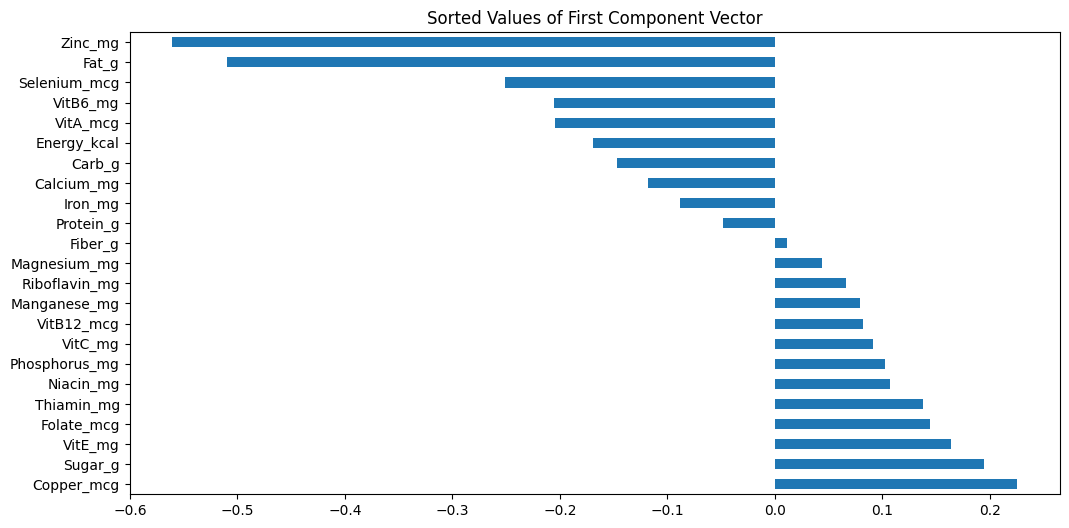

In [136]:
pc1_sorted = pd.Series(eigenvectors[0], index=df.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.title('Sorted Values of First Component Vector')
pc1_sorted.plot(kind='barh')
plt.show()


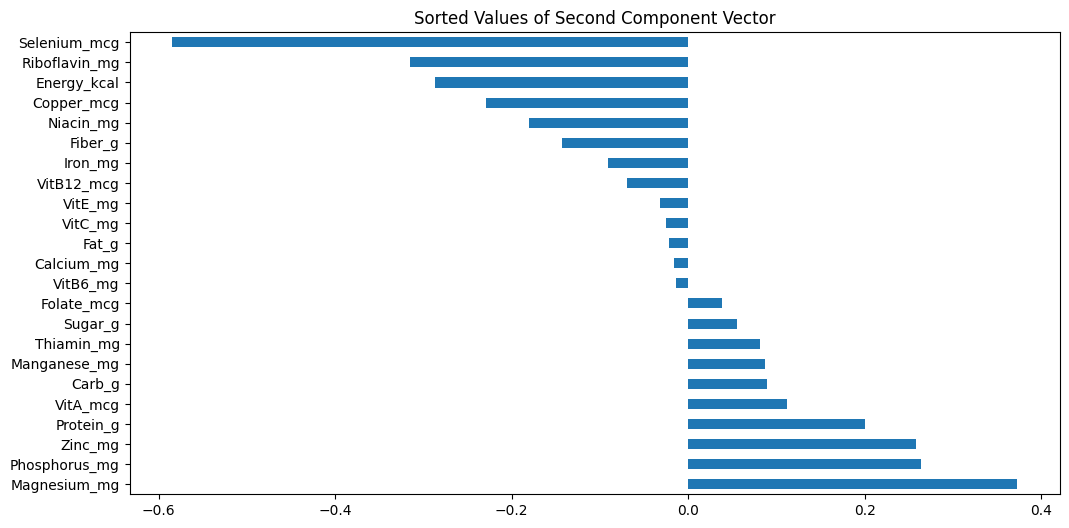

In [137]:
#TODO
pc2_sorted = pd.Series(eigenvectors[1], index=df.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.title('Sorted Values of Second Component Vector')
pc2_sorted.plot(kind='barh')
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size:20px;">
The plots above, show the contribution of each feature in each of the first and second components. The higher the absolute value of a feature in the plot, the greater its contibution. Samples which have higher amount of features with large positive values, have a relatively high score in
the PC. Meanwhile, samples with higher amount of features with large negative values have a low score in the PC. 

So, foods with high amounts of Zinc_mg, Fat_mg and Copper_mcg are key data points for the first component; and foods with high amounts of 
Selenium_mcg and Magnesium_mcg are key data points for the second component.
</span>





### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

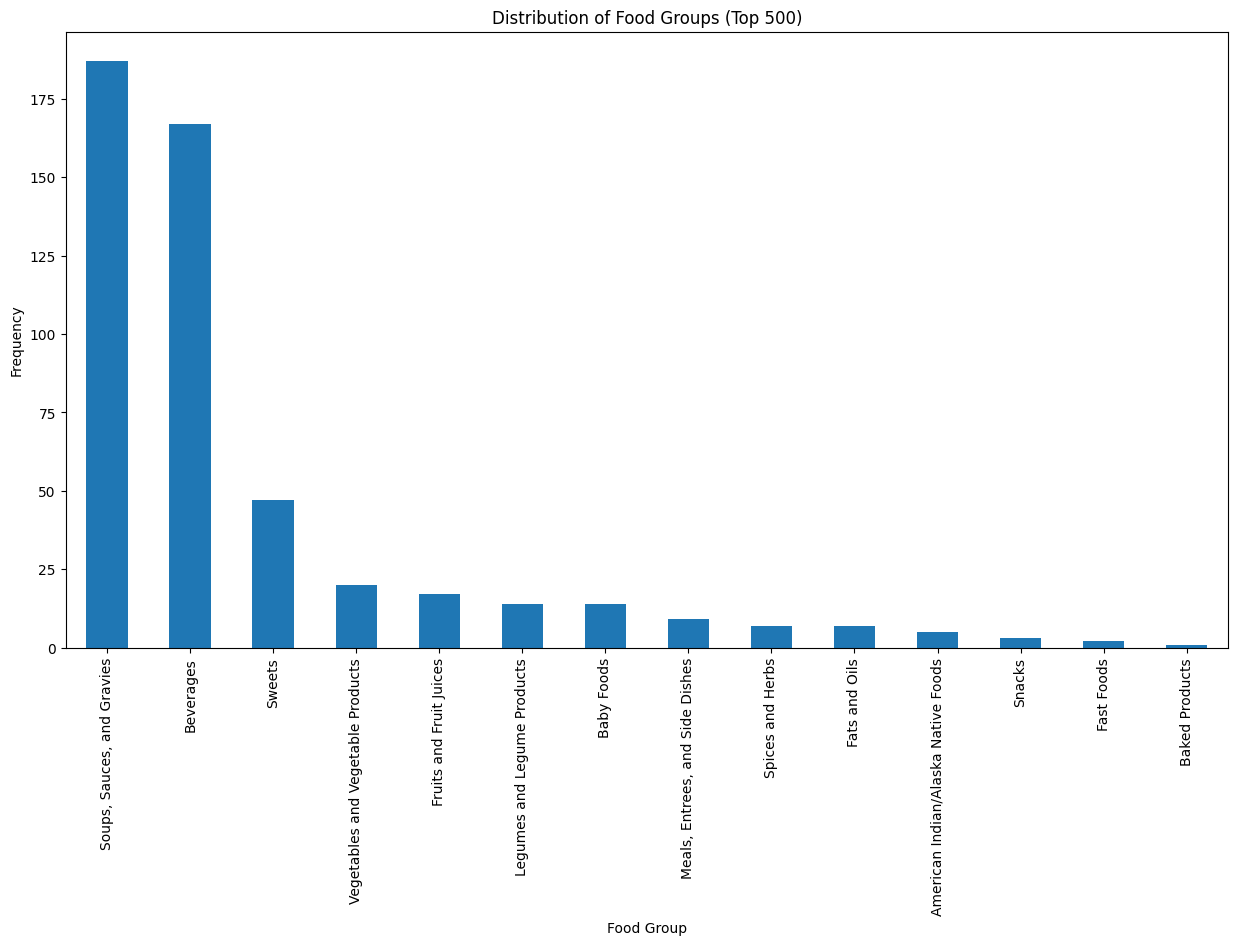

In [148]:
#TODO
pc1_df = pd.DataFrame({"Frequency": df_pca_5["c1"], "FoodGroup": df_pca_5["FoodGroup"]})
top_groups = pc1_df.nlargest(500, "Frequency")
freq_groups = top_groups["FoodGroup"].value_counts()

plt.figure(figsize=(15, 8))
freq_groups.plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Distribution of Food Groups (Top 500)')
plt.show()

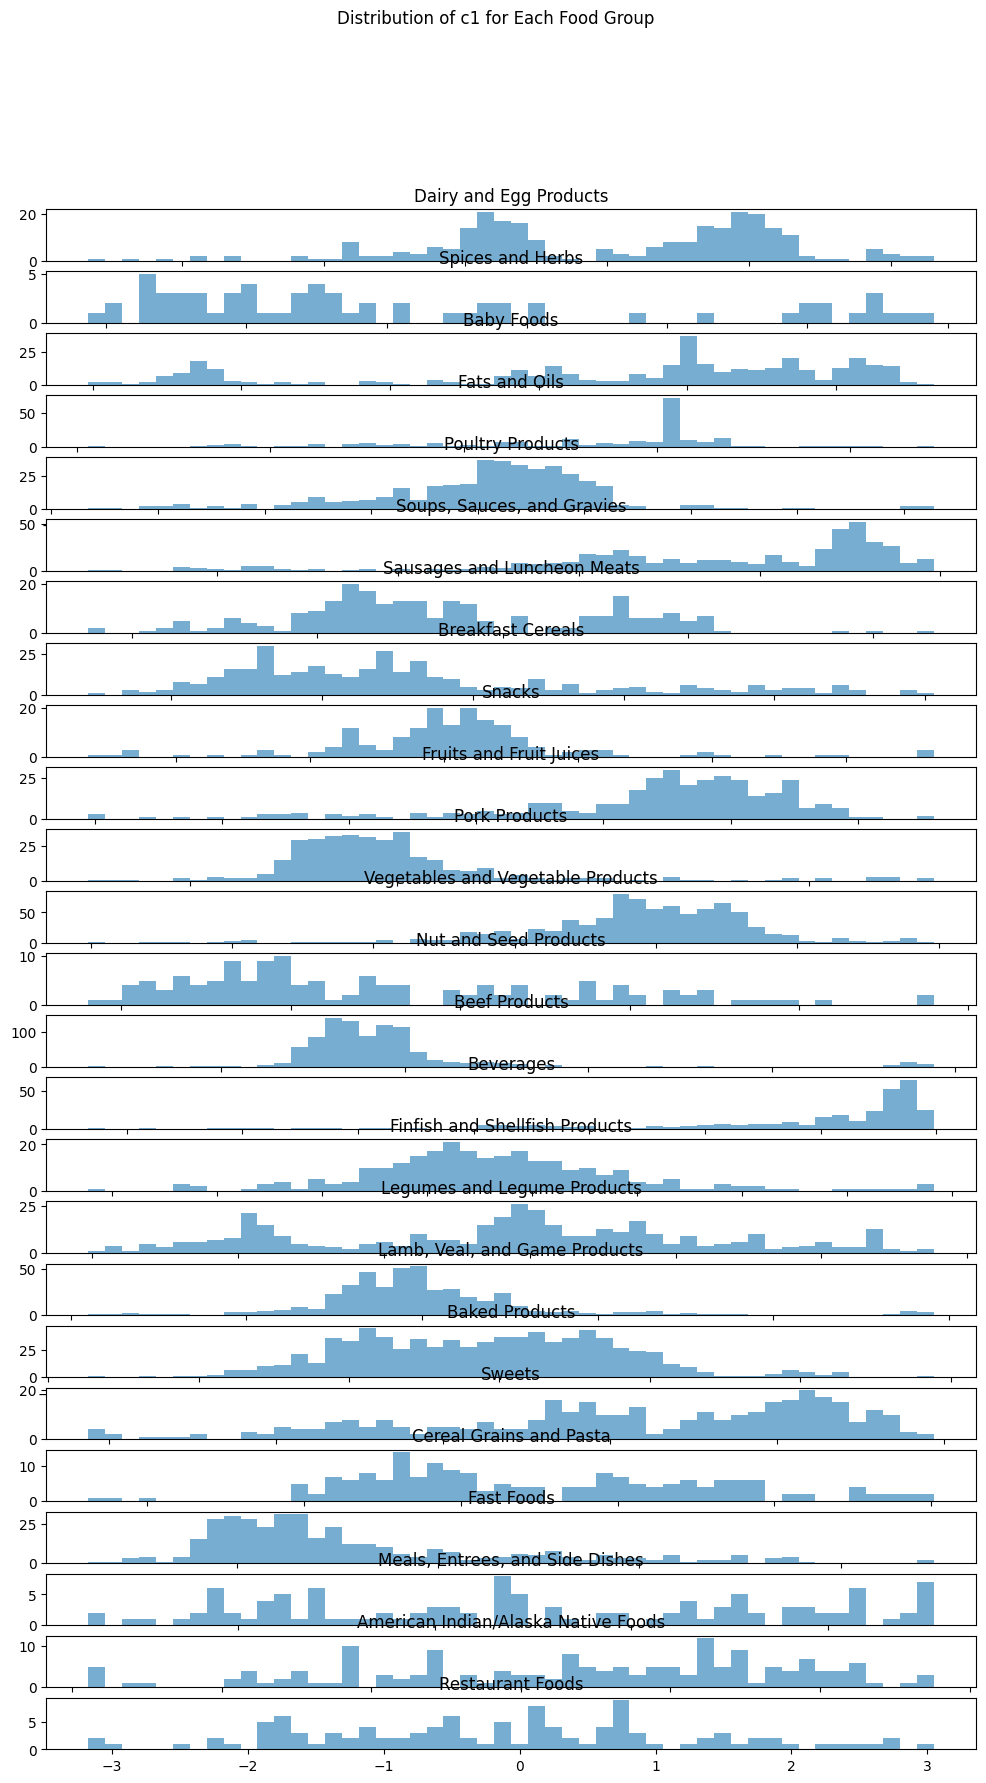

In [139]:
#TODO
unique_groups = df_pca_5['FoodGroup'].unique()
num_unique = len(unique_groups)
fig, axs = plt.subplots(num_unique, figsize=(12, 20))

for i, group in enumerate(unique_groups):
    mask = df_pca_5['FoodGroup'] == group
    c1_values = df_pca_5.loc[mask, 'c1']
    axs[i].hist(c1_values, bins=50, alpha=0.6)
    axs[i].set_title(group)

fig.suptitle('Distribution of c1 for Each Food Group')
plt.show()


Do the same for pca2.

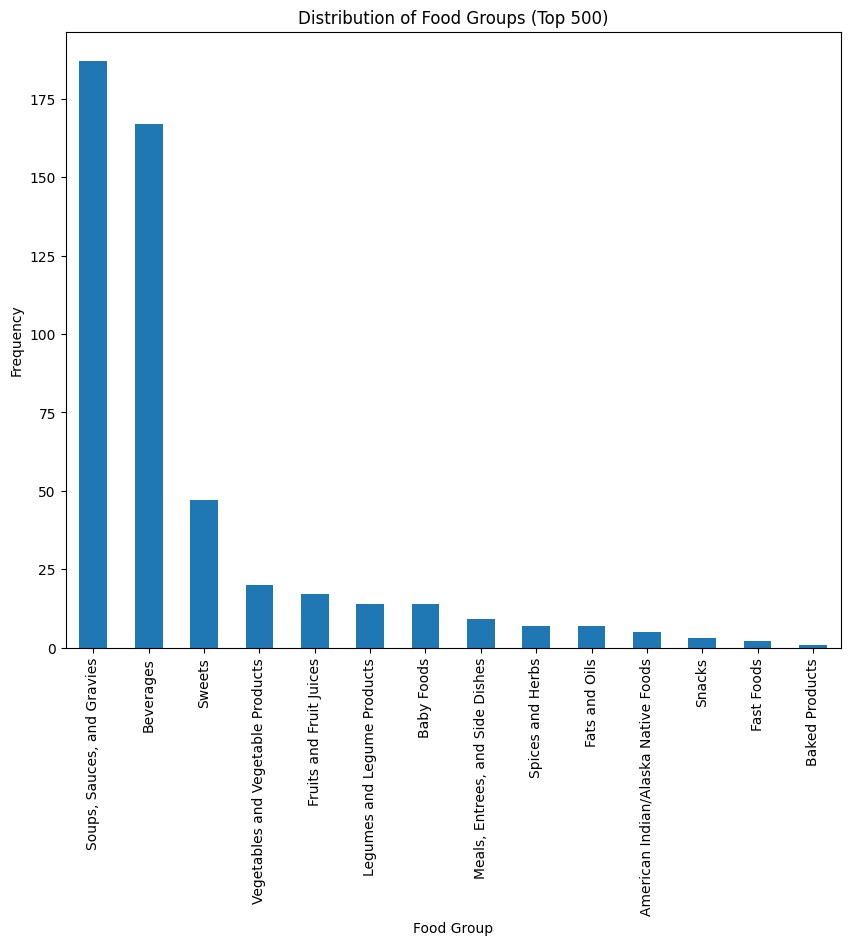

In [149]:
#TODO
pc1_df = pd.DataFrame({"Frequency": df_pca_5["c1"], "FoodGroup": df_pca_5["FoodGroup"]})
top_groups = pc1_df.nlargest(500, "Frequency")
freq_groups = top_groups["FoodGroup"].value_counts()
plt.figure(figsize=(10, 8))
freq_groups.plot(kind='bar')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Distribution of Food Groups (Top 500)')
plt.show()

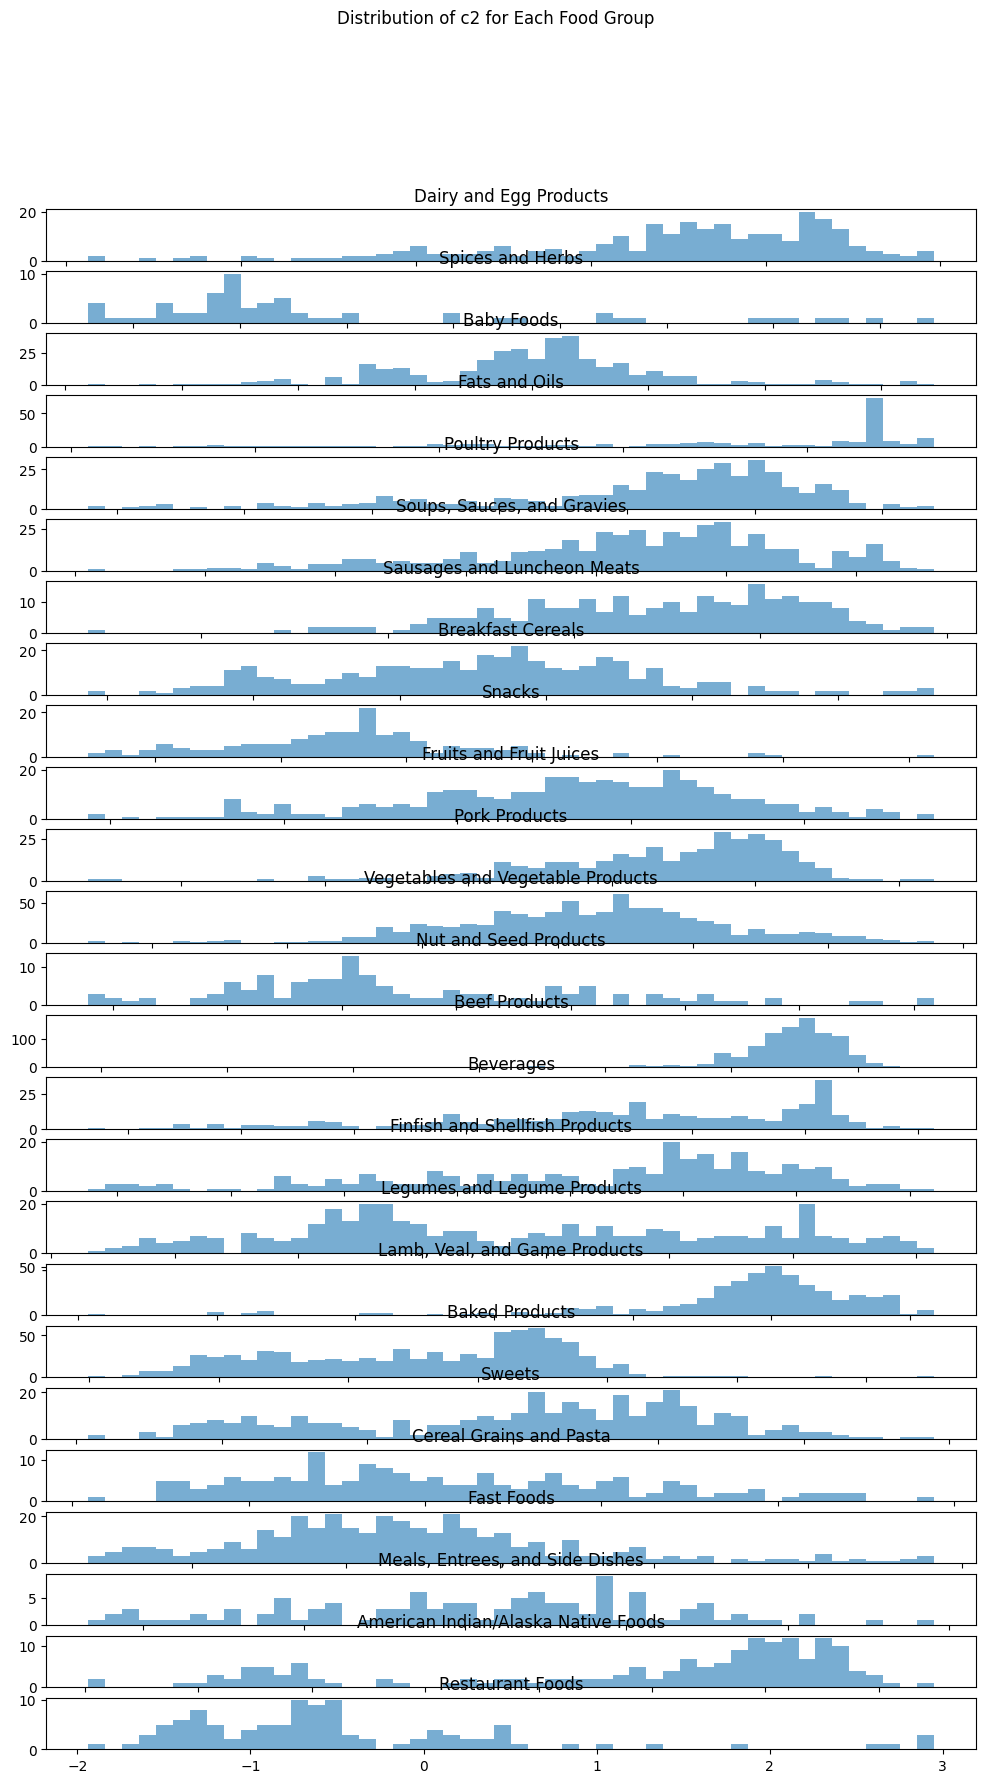

In [141]:
#TODO
unique_groups = df_pca_5['FoodGroup'].unique()
num_unique = len(unique_groups)
fig, axs = plt.subplots(num_unique, figsize=(12, 20))

for i, group in enumerate(unique_groups):
    mask = df_pca_5['FoodGroup'] == group
    c1_values = df_pca_5.loc[mask, 'c2']
    axs[i].hist(c1_values, bins=50, alpha=0.6)
    axs[i].set_title(group)

fig.suptitle('Distribution of c2 for Each Food Group')
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


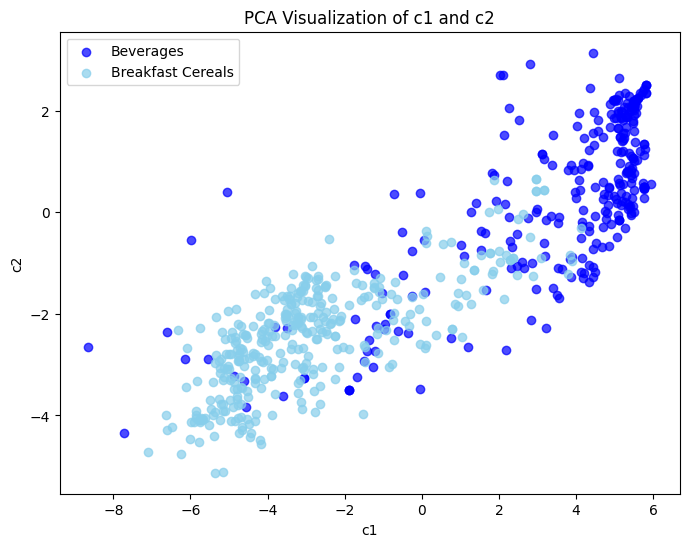

In [142]:
#TODO
unique_food_groups = ['Breakfast Cereals', 'Beverages']

plt.figure(figsize=(8, 6))

mask = df_pca_5['FoodGroup'] == 'Beverages'
plt.scatter(df_pca_5.loc[mask, 'c1'], df_pca_5.loc[mask, 'c2'], color='blue', label='Beverages', alpha=0.7)
mask = df_pca_5['FoodGroup'] == 'Breakfast Cereals'
plt.scatter(df_pca_5.loc[mask, 'c1'], df_pca_5.loc[mask, 'c2'], color='skyblue', label='Breakfast Cereals', alpha=0.7)

plt.title('PCA Visualization of c1 and c2')
plt.xlabel('c1')
plt.ylabel('c2')
plt.legend()
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">
The first plot for each PC, shows the relative score of each food group in the PC. The higher the frequency of the group, the higher the score  of that food group in the regarding PC. The second plot for each PC also shows a more detailed version and can be used for a more specific analysis of score of food groups.

Another applciation of the plots could be clustering. We can cluster food groups based on their contribution to each PC. The plots can be used for many other applications and analysis as well.
</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">
Considering 1st PC, the Beverages are centered around 5 and the Breakfast Cereals are centered around -4, which shows a considerable distance between these two groups according the this PC. Additionally, based on the 2nd PC, the Beverages are centered around 2 and the Breakfast Cereals are centered around -3, which also shows a significant distance between these two groups according to 2nd PC.

From distribution plots, we can see that these two groups have a considerably different distribution, so we assume that they could be seperated using PCA. The last plot shows the seperation of these two groups based on first and second PC, which is our expected result based on previous subsection plots.
</span>

